<a href="https://colab.research.google.com/github/jkcg-learning/HeartDiseasePrediction_XAI/blob/main/Jyothish_Kumar_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Description


* age: Age in years
* sex: 1 = male, 0 = female
* cp: Chest pain type
* trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholesterol in mg/dl
* fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
* restecg: Resting electrocardiographic results
* thalach: Maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: The slope of the peak exercise ST segment
* ca: Number of major vessels (0-4) colored by fluoroscopy
* thal: 0 = null, 1 = fixed defect found, 2 = blood flow is normal, 3 = reversible defect found
* target: 1 = Heart disease present, 0 = Heart disease not present

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )

In [3]:

print(f'\nTrain contains {heart_data.shape[0]} samples and {heart_data.shape[1]} variables')


Train contains 212 samples and 14 variables


In [4]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB


In [6]:
heart_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
TARGET_COL = 'target'

In [9]:
heart_data[TARGET_COL].value_counts(normalize=True)

1    0.542453
0    0.457547
Name: target, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


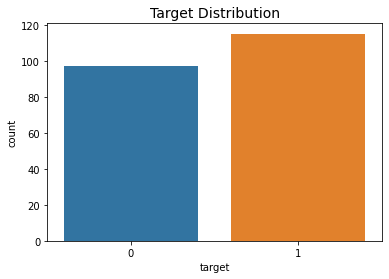

In [10]:
_ = sns.countplot(heart_data[TARGET_COL])
_ = plt.title("Target Distribution", fontsize=14)

In [11]:

heart_data.nunique()

age          40
sex           2
cp            4
trestbps     46
chol        134
fbs           2
restecg       3
thalach      82
exang         2
oldpeak      36
slope         3
ca            5
thal          4
target        2
dtype: int64

In [12]:
 cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

In [13]:
num_cols = ['age','trestbps','chol','thalach','oldpeak']

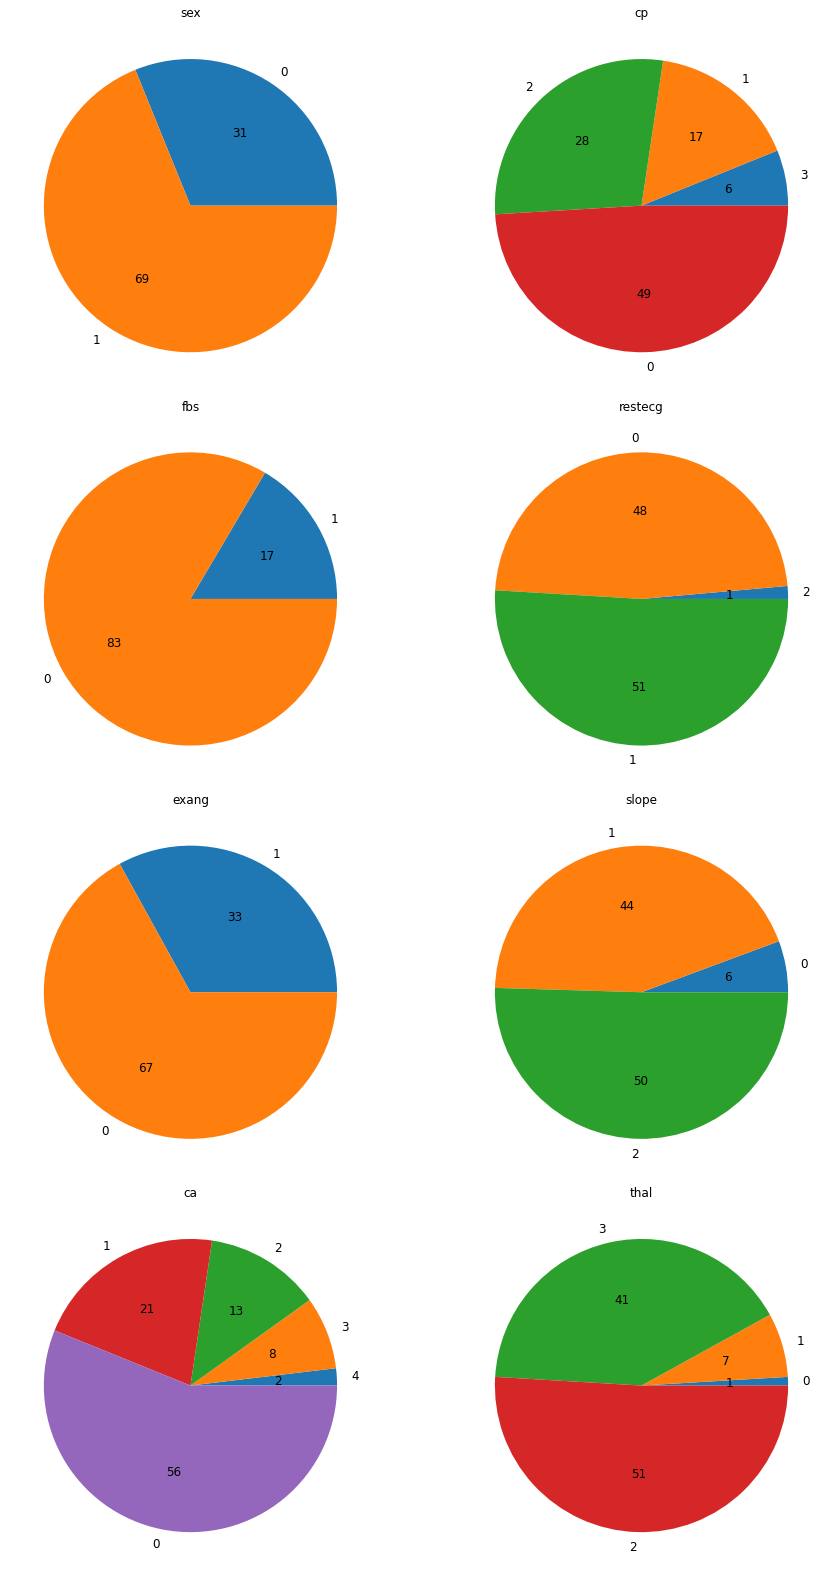

In [14]:
fig, axes = plt.subplots(4, 2, figsize=(14, 22))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(heart_data[cat_cols]):
    _ = heart_data[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=12)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

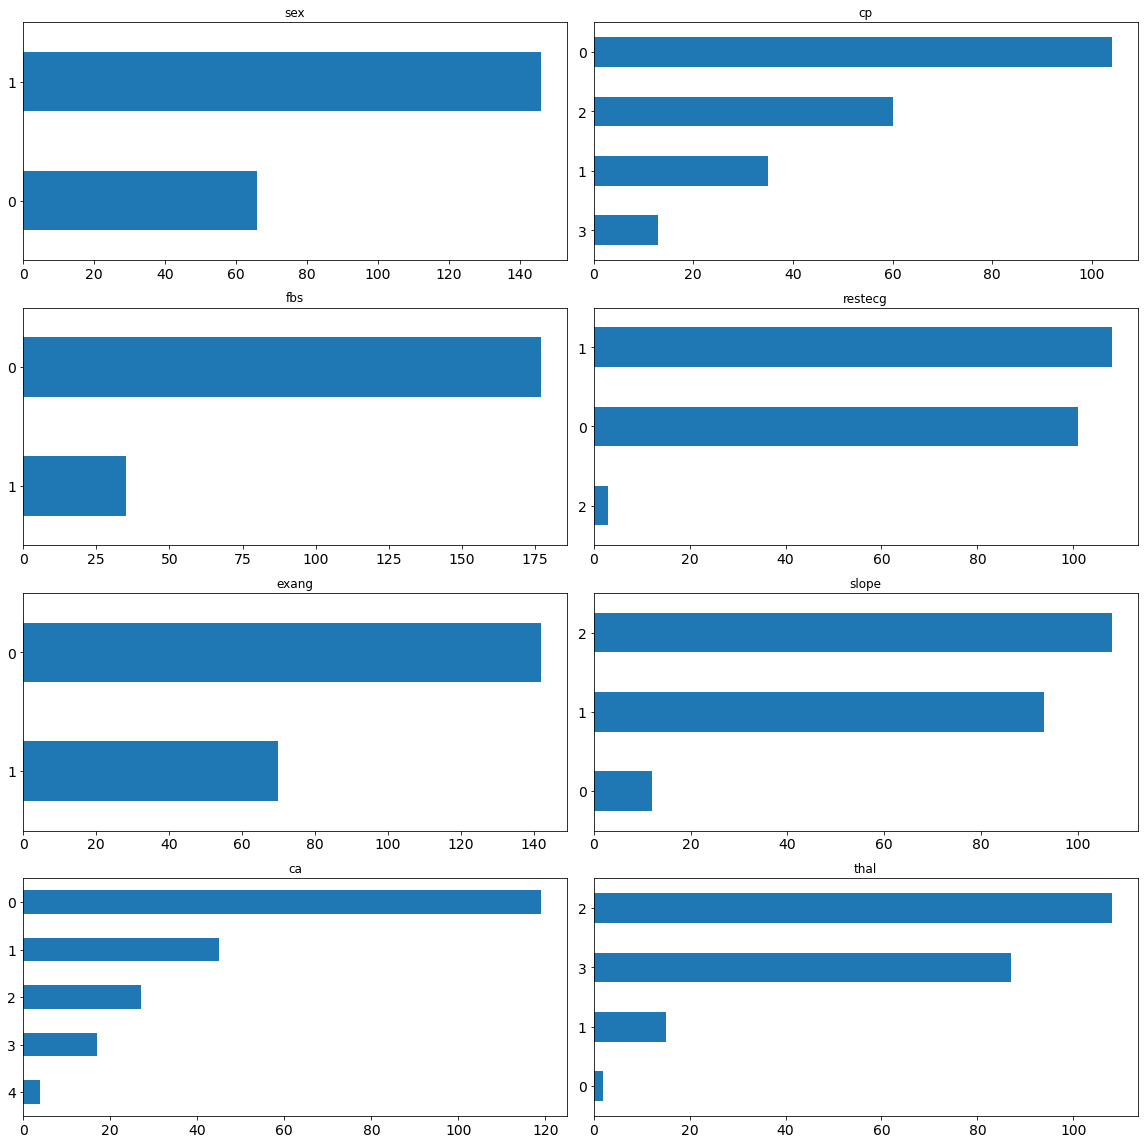

In [15]:
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(heart_data[cat_cols]):
    _ = heart_data[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

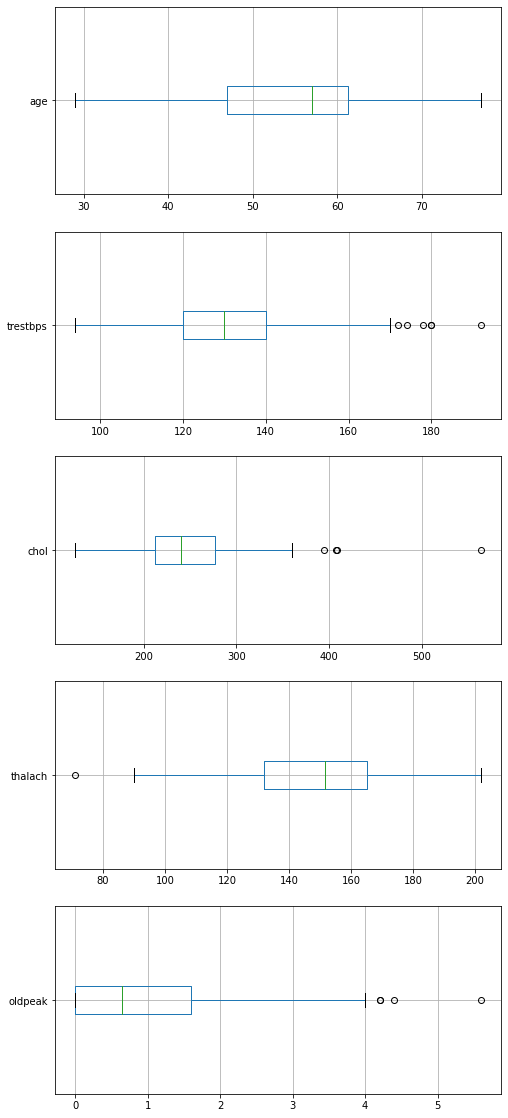

In [16]:
fig, axes = plt.subplots(5, 1, figsize=(8, 20))
for i, c in enumerate(num_cols):
  _ = heart_data[[c]].boxplot(ax=axes[i], vert=False)

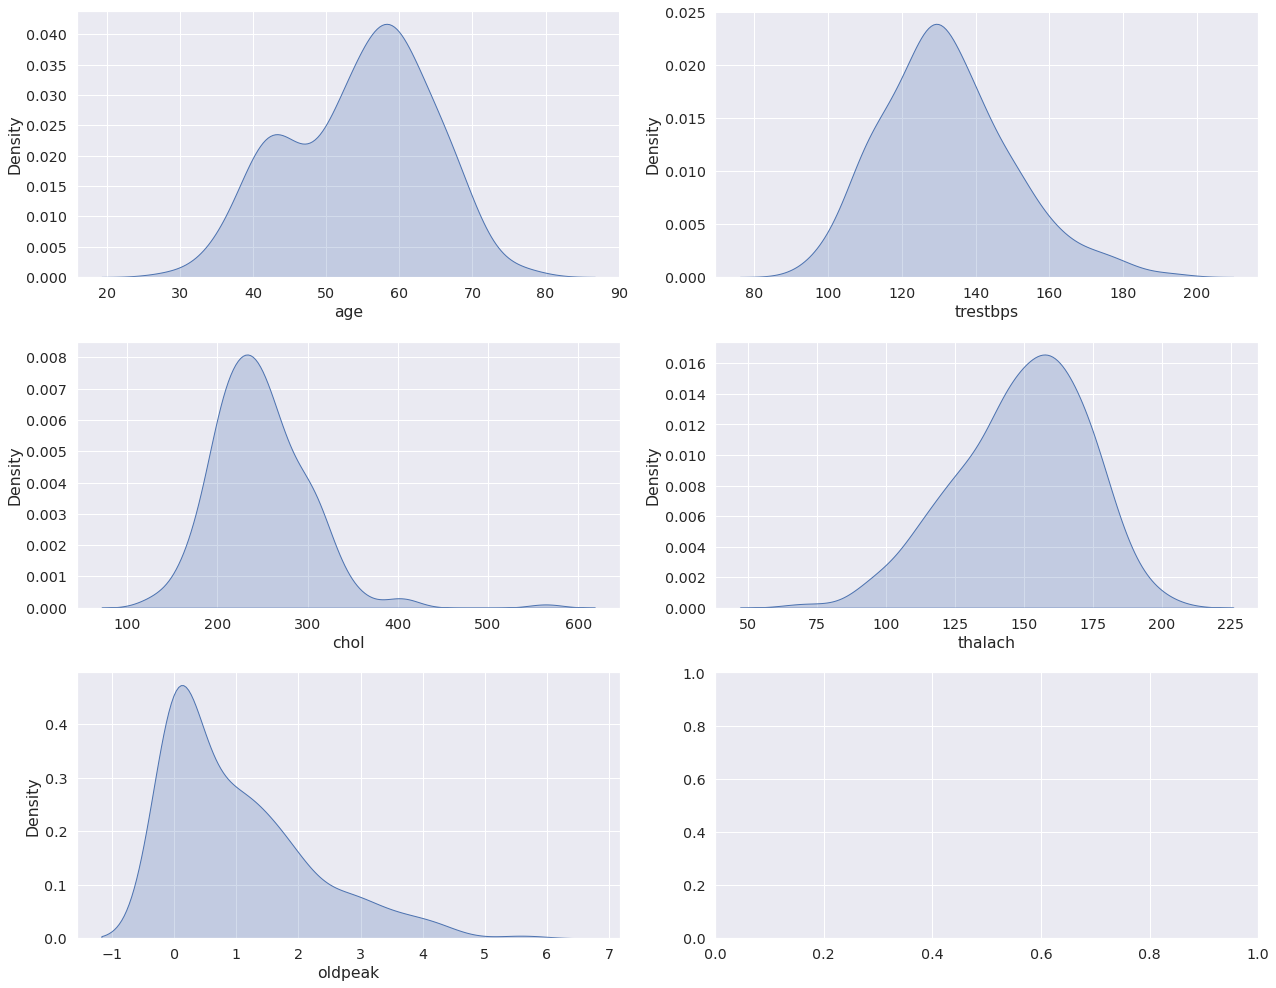

In [17]:

sns.set(font_scale=1.3)
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=heart_data, x=c, ax=axes[i], fill=True)
plt.tight_layout()

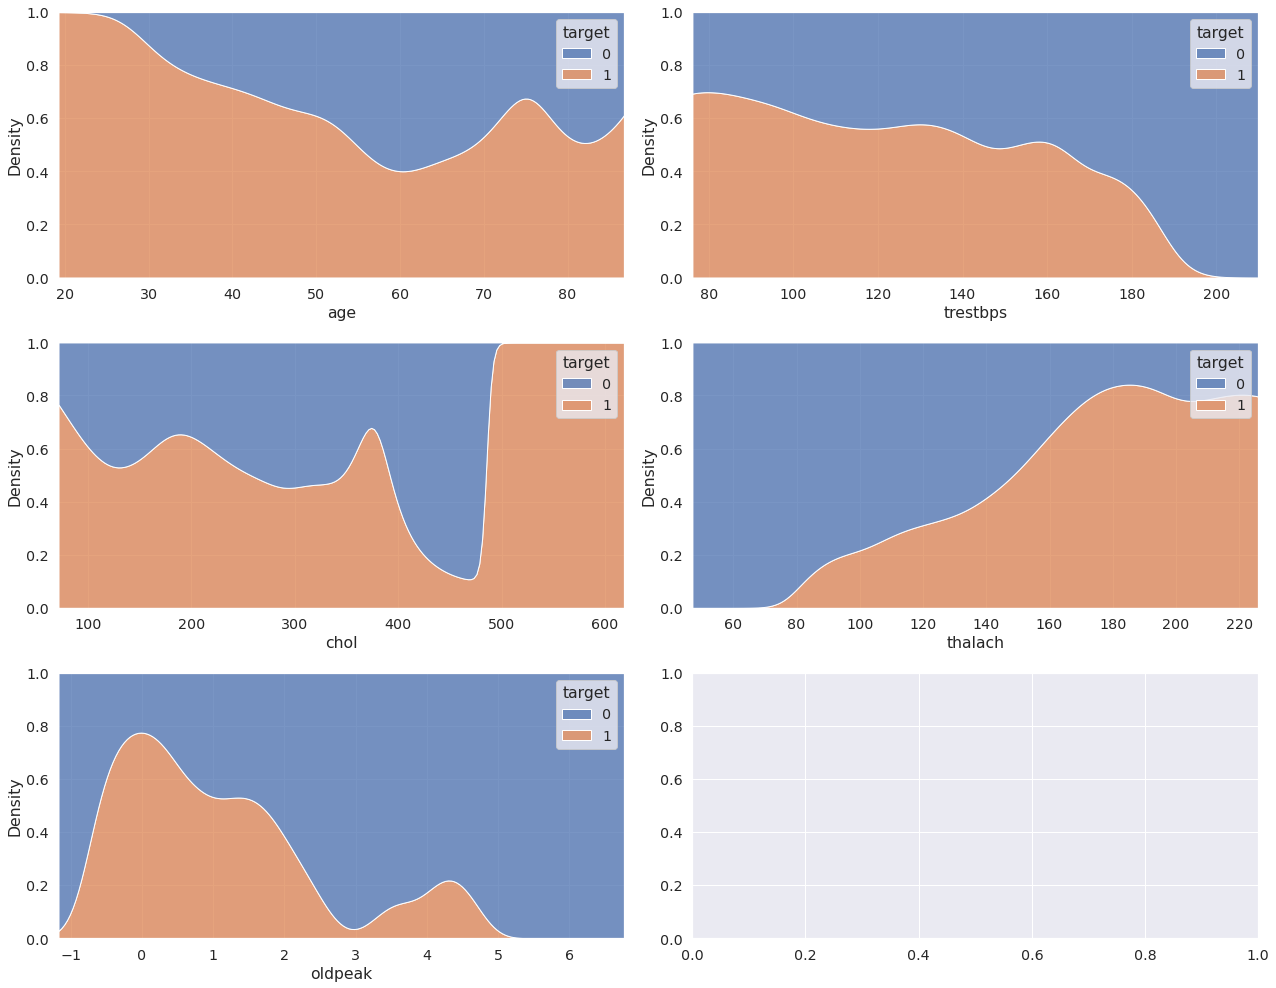

In [18]:

sns.set(font_scale=1.3)
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=heart_data, x=c, hue=TARGET_COL, multiple='fill', ax=axes[i])
plt.tight_layout()

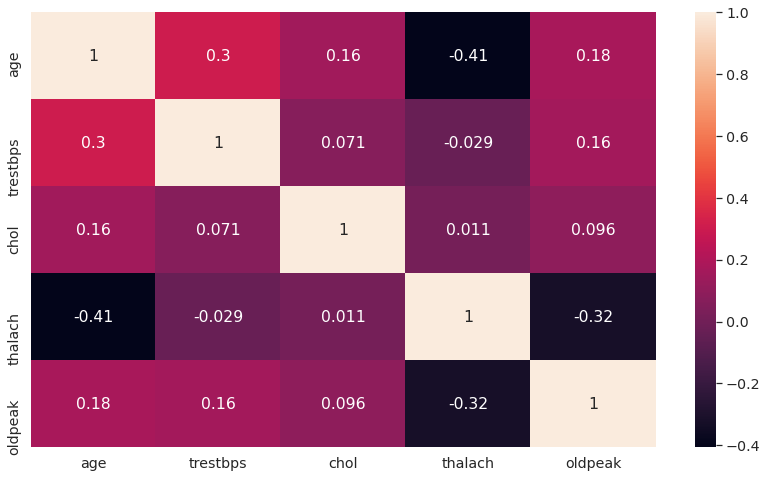

In [19]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(heart_data[num_cols].corr(), annot=True)

In [20]:
features = [c for c in heart_data.columns if c not in [TARGET_COL]]
features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [21]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Testing_set_heart.csv')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

In [23]:
train_features, validation_features, train_target, validation_target = train_test_split(heart_data[features],heart_data[TARGET_COL],
                                                                                        test_size=0.2, random_state = 0, stratify = heart_data[TARGET_COL])


In [24]:
scaler = StandardScaler()
_ = scaler.fit(train_features)

train_features_scaled = scaler.transform(train_features)
validation_features_scaled = scaler.transform(validation_features)
#X_test = scaler.transform(X_test)

In [56]:
model_1_lr = LogisticRegression(random_state = 1, max_iter = 1000)
_ = model_1_lr.fit(train_features_scaled, train_target)

In [57]:
print("Model intercept  : ", model_1_lr.intercept_, "\n")
print("Model coefficient: ", model_1_lr.coef_, "\n")

for i in range(len(train_features.columns)):
    print(train_features.columns[i], ": ", model_1_lr.coef_[0][i])

Model intercept  :  [0.07969862] 

Model coefficient:  [[ 0.10079932 -0.47582298  1.08679506 -0.44833132 -0.08182648 -0.01511114
   0.55027331  0.46590648 -0.66304095 -0.43605218  0.45993062 -0.61251067
  -0.66876048]] 

age :  0.10079931911037922
sex :  -0.47582298074835494
cp :  1.086795062966136
trestbps :  -0.4483313167021311
chol :  -0.08182648392439927
fbs :  -0.015111143310757611
restecg :  0.5502733090763294
thalach :  0.4659064825694921
exang :  -0.6630409479152165
oldpeak :  -0.43605217907115795
slope :  0.459930616720338
ca :  -0.6125106735593016
thal :  -0.6687604795405514


In [58]:
preds_train = model_1_lr.predict(train_features_scaled)
preds_val = model_1_lr.predict(validation_features_scaled)

print("F1 Score on Train Data: ",f1_score(train_target, preds_train) )
print("F1 Score on Validation Data: ",f1_score(validation_target, preds_val) )

F1 Score on Train Data:  0.8586387434554974
F1 Score on Validation Data:  0.8163265306122449


In [59]:
model_2_lr_lasso = LogisticRegression(random_state = 1,penalty='l1',solver='liblinear')
_ = model_2_lr_lasso.fit(train_features_scaled, train_target)

In [60]:
print("Model intercept  : ", model_2_lr_lasso.intercept_, "\n")
print("Model coefficient: ", model_2_lr_lasso.coef_, "\n")

for i in range(len(train_features.columns)):
    print(train_features.columns[i], ": ", model_2_lr_lasso.coef_[0][i])

Model intercept  :  [0.04216289] 

Model coefficient:  [[ 0.         -0.41792262  1.0638966  -0.39376385 -0.01423592  0.
   0.51967267  0.38905108 -0.6580554  -0.43309991  0.43441991 -0.59404029
  -0.64833391]] 

age :  0.0
sex :  -0.4179226159882795
cp :  1.0638965967074239
trestbps :  -0.3937638454609746
chol :  -0.01423592102790535
fbs :  0.0
restecg :  0.5196726663073357
thalach :  0.3890510829801072
exang :  -0.6580553977145002
oldpeak :  -0.43309990993705055
slope :  0.43441990954515985
ca :  -0.5940402851446007
thal :  -0.6483339051913024


In [61]:
preds_train = model_2_lr_lasso.predict(train_features_scaled)
preds_val = model_2_lr_lasso.predict(validation_features_scaled)

print("F1 Score on Train Data: ",f1_score(train_target, preds_train) )
print("F1 Score on Validation Data: ",f1_score(validation_target, preds_val) )

F1 Score on Train Data:  0.8631578947368421
F1 Score on Validation Data:  0.8163265306122449


In [86]:
model_3_XGB = XGBClassifier(n_estimators = 50,
                    max_depth = 5,
                    learning_rate = 0.09,
                    colsample_bytree = 0.09,
                    random_state=1452,
                    )

_ = model_3_XGB.fit(train_features_scaled, train_target)


In [87]:
preds_train = model_3_XGB.predict(train_features_scaled)
preds_val = model_3_XGB.predict(validation_features_scaled)

print("F1 Score on Train Data: ",f1_score(train_target, preds_train) )
print("F1 Score on Validation Data: ",f1_score(validation_target, preds_val) )

F1 Score on Train Data:  0.9128205128205128
F1 Score on Validation Data:  0.8260869565217391


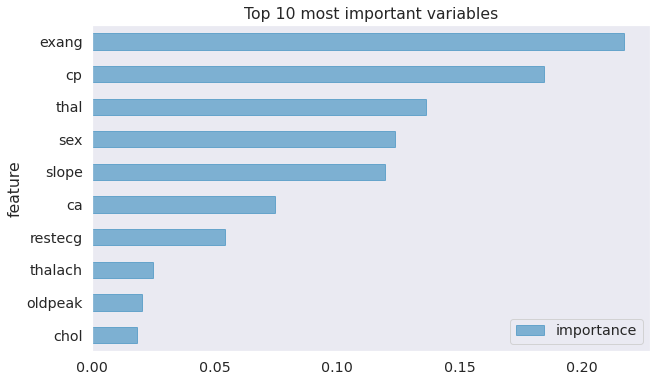

In [88]:
feature_importances_data = []
features = train_features.columns
for feature_name, feature_importance in zip(features, model_3_XGB.feature_importances_):
    feature_importances_data.append({
        'feature': feature_name,
        'importance': feature_importance
    })

# Plot the results
pd.DataFrame(feature_importances_data)\
    .set_index('feature')\
    .sort_values(by='importance')[-10::]\
    .plot(title='Top 10 most important variables',
          kind='barh',
          figsize=(10, 6),
          color='#348ABD',
          alpha=0.6,
          lw='1',
          edgecolor='#348ABD',
          grid=False,)

In [89]:

!pip install shap

In [90]:
import shap
# creating an explainer for our model
explainer_lr = shap.LinearExplainer(model_1_lr,train_features_scaled)

# finding out the shap values using the explainer
shap_values_lr = explainer_lr.shap_values(validation_features_scaled)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer_lr.expected_value)

# displaying the first 5 rows of the shap values table
pd.DataFrame(shap_values_lr,columns=validation_features.columns).head()

Expected Value: 0.27963727093770385


The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.030652,0.693897,0.163683,-0.007100,0.012560,0.003712,-0.653431,0.547122,0.420728,0.375968,-0.298153,-0.240962,0.318399
1,-0.000840,-0.326540,-0.927534,0.139791,-0.033224,0.003712,-0.653431,-0.736738,-0.981700,-0.489231,-0.298153,-0.240962,-0.742932
2,-0.179291,-0.326540,1.254899,-0.007100,-0.008806,0.003712,0.400490,0.803893,0.420728,-1.000485,-1.082767,0.346751,0.318399
3,0.030652,-0.326540,-0.927534,0.482536,-0.138529,0.003712,0.400490,-0.065181,-0.981700,-0.803849,-0.298153,-0.240962,-0.742932
4,0.020155,-0.326540,1.254899,-0.007100,-0.017963,-0.037532,-0.653431,-0.084932,-0.981700,0.140005,-0.298153,-0.240962,1.379730


In [99]:
shap.initjs()
shap.force_plot(explainer_lr.expected_value, shap_values_lr, validation_features)

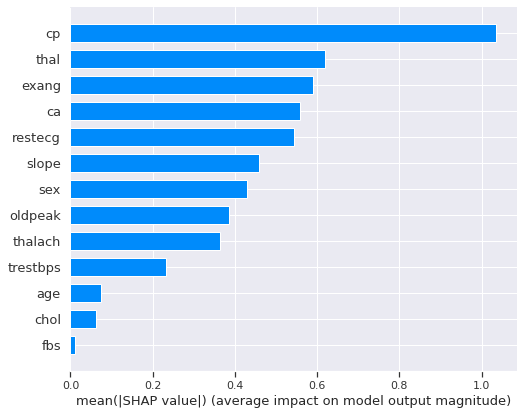

In [91]:
shap.summary_plot(shap_values_lr, validation_features, plot_type='bar')

In [100]:
shap.initjs()
shap.force_plot(explainer_lr.expected_value, shap_values_lr[0, :], validation_features.iloc[0, :])

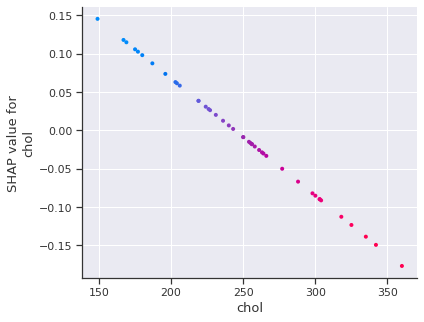

In [93]:
shap.dependence_plot(ind='chol', interaction_index='chol',
                     shap_values=shap_values_lr, 
                     features=validation_features,  
                     display_features=validation_features)

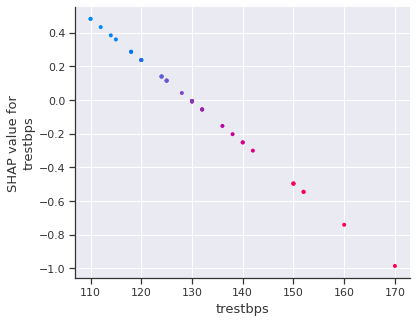

In [94]:
shap.dependence_plot(ind='trestbps', interaction_index='trestbps',
                     shap_values=shap_values_lr, 
                     features=validation_features,  
                     display_features=validation_features)

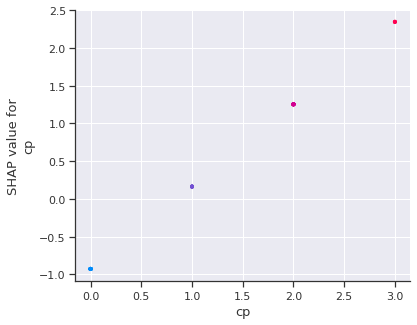

In [95]:
shap.dependence_plot(ind='cp', interaction_index='cp',
                     shap_values=shap_values_lr, 
                     features=validation_features,  
                     display_features=validation_features)

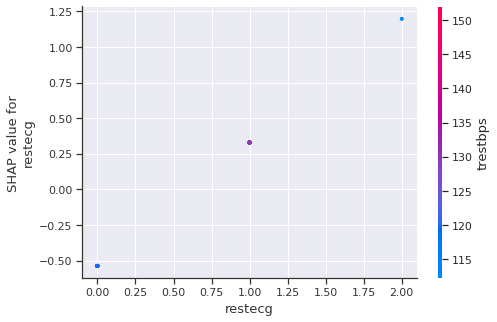

In [41]:
shap.dependence_plot(ind='restecg', interaction_index='trestbps',
                     shap_values=shap_values_lr, 
                     features=validation_features,  
                     display_features=validation_features)

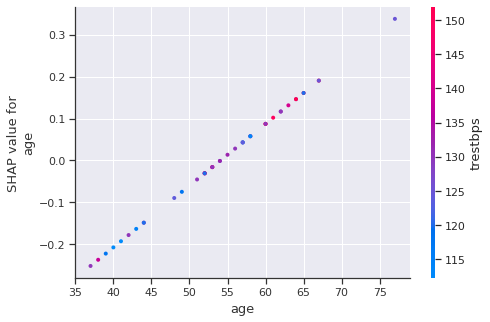

In [42]:
shap.dependence_plot(ind='age', interaction_index='trestbps',
                     shap_values=shap_values_lr, 
                     features=validation_features,  
                     display_features=validation_features)

In [103]:
# creating an explainer for our model
explainer_xgb = shap.TreeExplainer(model_3_XGB,train_features_scaled)

# finding out the shap values using the explainer
shap_values_xgb = explainer_xgb.shap_values(validation_features_scaled)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer_xgb.expected_value)

# displaying the first 5 rows of the shap values table
pd.DataFrame(shap_values_xgb,columns=validation_features.columns).head()

Expected Value: 0.3137945963745005


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.047864,0.059265,0.362075,-0.001329,0.326071,0.003724,-0.099609,0.088844,0.177179,0.107849,-0.286741,-0.184328,0.292140
1,0.104062,-0.027889,-0.430954,0.036326,0.040654,0.003724,-0.099609,-0.089138,-0.413418,-0.229388,-0.286741,-0.184328,-0.345010
2,0.091385,-0.027889,0.447588,-0.001329,-0.153213,0.003724,0.069220,0.041284,0.177179,-0.468281,0.000524,0.130061,0.292140
3,-0.047864,-0.027889,-0.430954,-0.051250,-0.240588,0.003724,0.069220,-0.017522,-0.413418,-0.468281,-0.286741,-0.184328,-0.345010
4,-0.083864,-0.027889,0.447588,-0.001329,-0.153213,-0.037658,-0.099609,-0.017522,-0.413418,0.287006,-0.286741,-0.184328,-0.122084


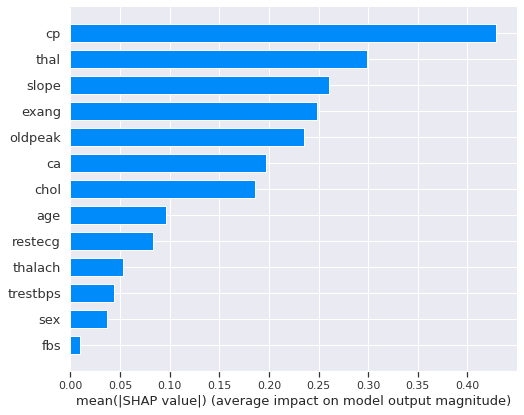

In [104]:
shap.summary_plot(shap_values_xgb, validation_features, plot_type='bar')

In [105]:
shap.initjs()
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[0, :], validation_features.iloc[0, :])

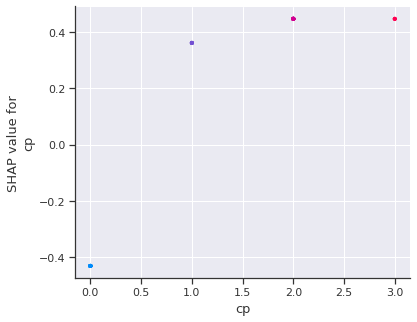

In [106]:
shap.dependence_plot(ind='cp', interaction_index='cp',
                     shap_values=shap_values_xgb, 
                     features=validation_features,  
                     display_features=validation_features)

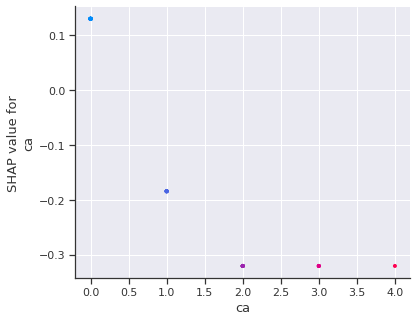

In [107]:
shap.dependence_plot(ind='ca', interaction_index='ca',
                     shap_values=shap_values_xgb, 
                     features=validation_features,  
                     display_features=validation_features)

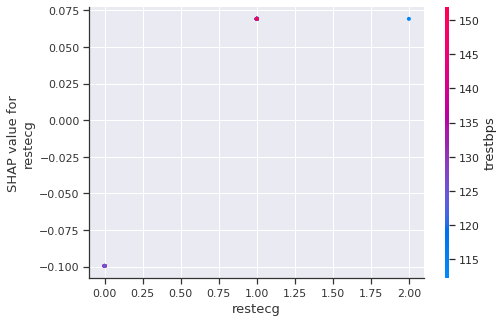

In [109]:
shap.dependence_plot(ind='restecg', interaction_index='trestbps',
                     shap_values=shap_values_xgb, 
                     features=validation_features,  
                     display_features=validation_features)

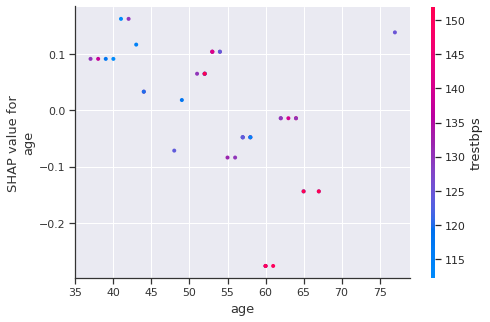

In [110]:
shap.dependence_plot(ind='age', interaction_index='trestbps',
                     shap_values=shap_values_xgb, 
                     features=validation_features,  
                     display_features=validation_features)

In [111]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Testing_set_heart.csv')

In [112]:
test_features = test_data[features]

In [115]:
test_features_scaled = scaler.transform(test_features)

In [116]:
preds_test_model_1 = model_1_lr.predict(test_features_scaled)

In [117]:
preds_test_model_2 = model_2_lr_lasso.predict(test_features_scaled)

In [118]:
preds_test_model_3 = model_3_XGB.predict(test_features_scaled)

In [122]:
submission_data = pd.DataFrame({'prediction':preds_test_model_2})
submission_data.to_csv('submission_7.csv', index = False)